In [3]:
from datetime import datetime, timedelta
import numpy as np
import sys
sys.path.append('./lib')

from ncmapper import NetCDFDataset
from ncmapper import analyze_nc

In [2]:
# for 舜宇

# [前端]使用者首先先上傳檔案到後端，假設上傳至後端後，檔案路徑位在後端伺服器的"data/sample.nc"
file_path = "data/sample.nc"

# [後端]分析該檔案的所有軸名
coor_name_list = analyze_nc.coor_name_list_of_nc(file_path)

# [後端]將軸名回傳給前端
print(coor_name_list)

# [前端]使用者選擇要當作longitude, latitude, height, time的軸名
longitude_name = "longitude"
latitude_name = "latitude"
height_name = "level" # 可以是None
time_name = "time" # 可以是None

# [後端]使用者選擇的軸名，將其作為NetCDFDataset的參數
ncdataset = NetCDFDataset(file_path, x_name=longitude_name, y_name=latitude_name, z_name=height_name, time_name=time_name)
variable_list = ncdataset.variable_list

# [後端]回傳變數列表給前端
print(variable_list)

# [前端]使用者選擇要使用的第一個變數（例如shading）
variable_name = "2m_temperature"

# [後端]根據使用者選擇的變數，判斷該變數的高度列表，並回傳給前端
height_list = ncdataset.show_z_list_of_specific_variable(variable_name)

# [前端]使用者提供選單給使用者選擇第一個變數的高度
print(height_list)

# [前端]使用者選擇要使用的變數（例如contour）
variable_name = "geopotential"

# [後端]根據使用者選擇的變數，判斷該變數的高度列表，並回傳給前端
height_list = ncdataset.show_z_list_of_specific_variable(variable_name)

# [前端]使用者提供選單給使用者選擇第二個變數的高度
print(height_list)

['latitude', 'level', 'time', 'longitude']
['2m_temperature', 'geopotential']
[]
[1000.0, 900.0, 800.0, 500.0, 300.0]


In [ ]:
# for 楚鈞

# [前端] 如果前端的選擇是：
# 軸名
longitude_name = "longitude"
latitude_name = "latitude"
height_name = "level"
time_name = "time"

# [後端] 根據前端的選擇，建立NetCDFDataset
# 建立NetCDFDataset
ncdataset = NetCDFDataset(file_path, 
                          x_name=longitude_name, 
                          y_name=latitude_name, 
                          z_name=height_name, 
                          time_name=time_name)

# [後端] 解析出有哪些變數與高度並回傳給前端
variable_list = ncdataset.variable_list

# [使用者] 選擇要繪製的變數
# contour layer
contour_variable_name = "geopotential"
contour_height = 300
# shading layer
shading_variable_name = "2m_temperature"
shading_height = None # 此變數沒有高度座標，因為一率都是2m高的氣溫

# [後端]根據前端的選擇，將該變數組合在所有時間點的圖層都轉為geotiff檔案
time_list = ncdataset.time_list
for time in time_list:
    time_of_filename = np.datetime64(time, 's').astype(datetime)
    time_of_filename = time_of_filename.strftime('%Y%m%d%H%M%S')

    ncdataset.select_to_geotiff(
        save_at=f"geotiff/{contour_variable_name}_{contour_height}_time_{time_of_filename}.tif",
        variable=contour_variable_name,
        time=time,
        z=contour_height,
    )

    ncdataset.select_to_geotiff(
        save_at=f"geotiff/{shading_variable_name}_{shading_height}_time_{time_of_filename}.tif",
        variable=shading_variable_name,
        time=time,
        z=shading_height,
    )

In [1]:
import sys
sys.path.append('./lib')

from quickmap import ContourLayer
contour_layer = ContourLayer(
    "/Users/ericlwc/Library/Mobile Documents/com~apple~CloudDocs/作業/碩一上/網際網路地理資訊系統/Project/NC_Mapper/backend/geotiff/geopotential_300_time_20200101000000.tif",
)

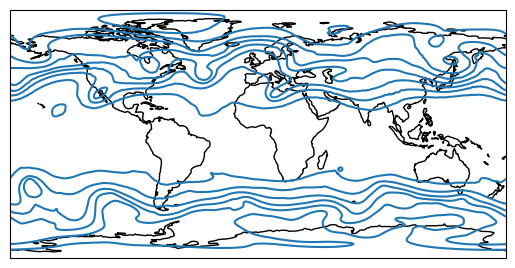

In [18]:
# 將gj的資料繪製在地圖上，並且疊加海岸線
from matplotlib import pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# export geotiff to geojson
contour_layer = ContourLayer(
    geotiff_path="./geotiff/geopotential_300_time_20200101000000.tif",
    band=1,
    value_base=0,
    value_interval=2000
)
geojson_str = contour_layer.export_to_geojson()

# plot gdf with cartopy and ax.coastline()
gdf = gpd.read_file(geojson_str)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
gdf.plot(ax=ax, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
plt.show()